# Compare Results of PSD, DFS and VLSD

In [1]:

# Print the current file path
# print("Current file path:", os.path.abspath("SF_Comparison_Results_LR.ipynb"))

In [2]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
# import ptitprince as pt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
PSD_df = pd.read_csv('../PSD/PSD_results.csv')
DFS_df = pd.read_csv('../DFS/DFS_results.csv')
VLSD_df = pd.read_csv('../VLSD/VLSD_results.csv')

PSD_df = PSD_df.drop_duplicates()
DFS_df = DFS_df.drop_duplicates()
VLSD_df = VLSD_df.drop_duplicates()

PSD_df = PSD_df[PSD_df['description'] != '{}']
DFS_df = DFS_df[DFS_df['description'] != '{}']
VLSD_df = VLSD_df[VLSD_df['description'] != '{}']
    

PSD_df['model'] = 'PSD+'
VLSD_df['model'] = 'VLSD'
DFS_df['model'] = 'DFS'

# colors = ['#ff6d6d', '#c2891c', '#5d9a2e']
# palette = { 'Kmedoids': colors[0], 'VLSD': colors[1], 'DFS': colors[2] }
palette = {'PSD+': '#1f77b4', 'VLSD': '#ff7f0e', 'DFS': '#2ca02c'}
combined_df = pd.concat([PSD_df, VLSD_df, DFS_df])

# Internal Subgroup Fairness

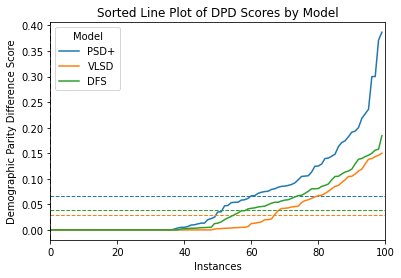

In [4]:
sorted_dpd_data = {}

# Loop through each model and sort DPD scores
models = ['PSD+', 'VLSD', 'DFS']
for model in models:
    subset = combined_df[combined_df['model'] == model]
    sorted_dpd = np.sort(subset['demographic_parity_difference'])
    sorted_dpd_data[model] = sorted_dpd

# Plot the sorted DPD scores

for model in models:
    plt.plot(sorted_dpd_data[model], label=model, color=palette[model])
    mean_dpd = np.mean(sorted_dpd_data[model])
    plt.axhline(y=mean_dpd, color=palette[model], linestyle='--', linewidth=1)

# Add a vertical line at x = 0
plt.axvline(x=0, color='black', linestyle='--')

# Set x-axis limits to match the DPD score range
plt.xlim(0, max([len(sorted_dpd_data[model]) for model in models]))

# Add labels and title
plt.xlabel('Instances')
plt.ylabel('Demographic Parity Difference Score')
plt.title('Sorted Line Plot of DPD Scores by Model')
plt.legend(title='Model')

# Show the plot
plt.show()

In [5]:
def line_plot(feature, name='DPD'):
    sorted_dpd_data = {}
    plt.figure(figsize=(10, 6))
    # Loop through each model and sort DPD scores
    for model in models:
        subset = combined_df[combined_df['model'] == model]
        sorted_dpd = np.sort(subset[feature])
        sorted_dpd_data[model] = sorted_dpd

    # Plot the sorted DPD scores
    for model in models:
        plt.plot(sorted_dpd_data[model], label=model, color=palette[model])

    # Add horizontal line at mean DPD score
    mean_lines = []
    for model in models:
        mean_dpd = np.mean(sorted_dpd_data[model])
        line = plt.axhline(y=mean_dpd, color=palette[model], linestyle='--', linewidth=1)
        mean_lines.append(line)
    
    # Add a vertical line at x = 0
    plt.axvline(x=0, color='black', linestyle='--')

    # Set x-axis limits to match the DPD score range
    plt.xlim(0, max([len(sorted_dpd_data[model]) for model in models]))

    # Add labels and title
    plt.xlabel('Subgroups')
    plt.ylabel(feature)
    plt.title('Sorted Line Plot of ' + name + ' Scores by Model with Mean Lines')
    max_x = max([len(sorted_dpd_data[model]) for model in models])
    plt.xticks(np.arange(0, max_x + 1, 10))
    # Add legend for models
    model_legend = plt.legend(title='Model', loc='upper left')

    # Add legend for mean lines
    # mean_legend = plt.legend(mean_lines, [f'{model} Mean' for model in models], loc='upper left')
    plt.gca().add_artist(model_legend)  # Add the first legend back

    # Show the plot
    plt.show()

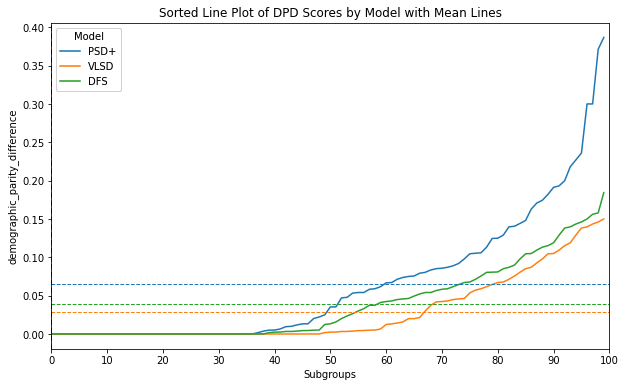

In [6]:
line_plot('demographic_parity_difference')

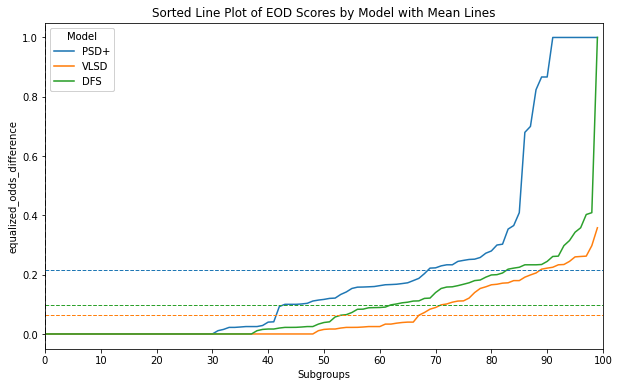

In [7]:
line_plot('equalized_odds_difference', name='EOD')

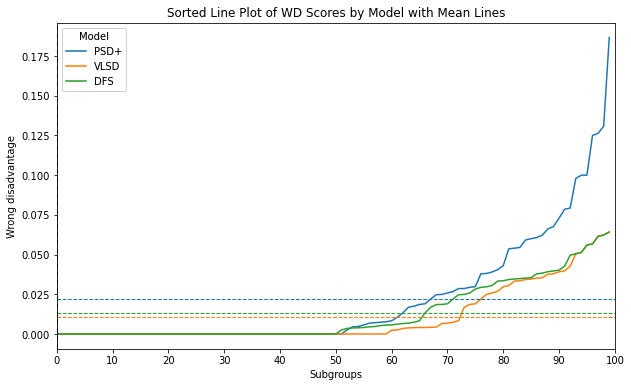

In [8]:
line_plot('Wrong disadvantage', name='WD')

# External

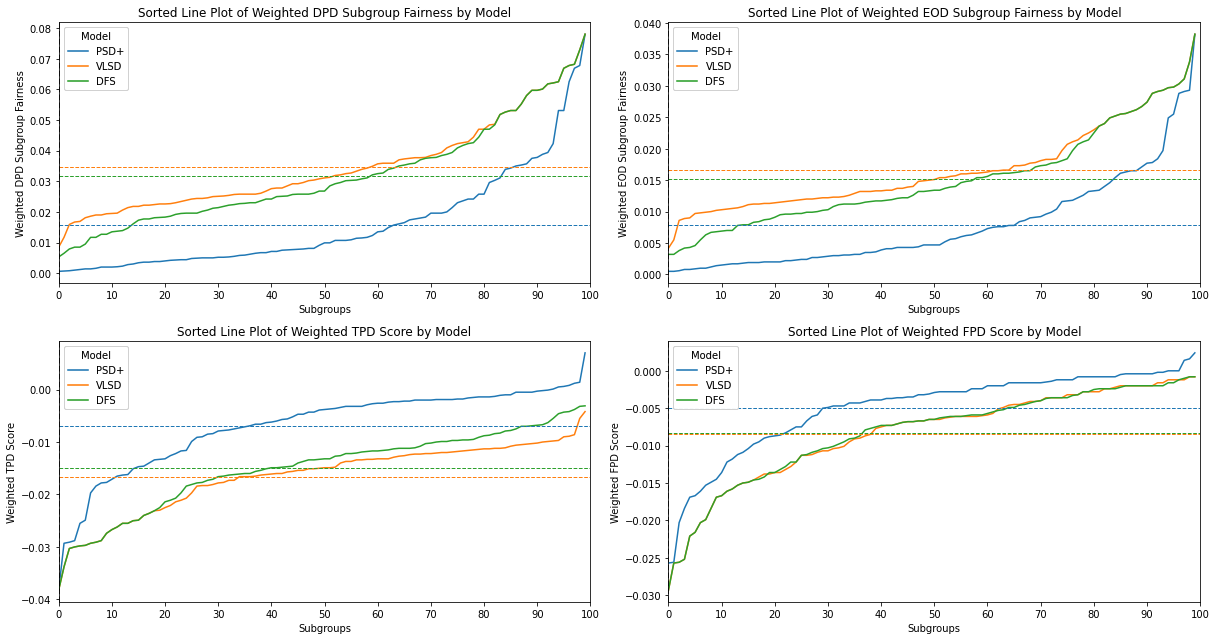

In [9]:
# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(17, 9))

metrics = [
    ('weighted_dpd_subgroup', 'Weighted DPD Subgroup Fairness'),
    ('weighted_eod_subgroup', 'Weighted EOD Subgroup Fairness'),
    ('weighted_tp_subgroup', 'Weighted TPD Score'),
    ('weighted_fp_subgroup', 'Weighted FPD Score')
]

# Plot each metric in the corresponding subplot
for (metric, xlabel), ax in zip(metrics, axes.flatten()):
    sorted_dpd_data = {}

    # Loop through each model and sort the metric scores
    for model in combined_df['model'].unique():
        subset = combined_df[combined_df['model'] == model]
        sorted_dpd = np.sort(subset[metric])
        sorted_dpd_data[model] = sorted_dpd

    # Plot the sorted metric scores
    for model in combined_df['model'].unique():
        ax.plot(sorted_dpd_data[model], label=model, color=palette[model])

    # Add horizontal line at mean metric score
    mean_lines = []
    for model in combined_df['model'].unique():
        mean_dpd = np.mean(sorted_dpd_data[model])
        line = ax.axhline(y=mean_dpd, color=palette[model], linestyle='--', linewidth=1)
        mean_lines.append(line)

    # Add a vertical line at x = 0
    ax.axvline(x=0, color='black', linestyle='--')

    # Set x-axis limits to match the number of instances
    max_x = max([len(sorted_dpd_data[model]) for model in combined_df['model'].unique()])
    ax.set_xlim(0, max_x)

    # Set x-axis ticks to be in steps of 10
    ax.set_xticks(np.arange(0, max_x + 1, 10))

    # Add labels and title
    ax.set_xlabel('Subgroups')
    ax.set_ylabel(xlabel)
    ax.set_title(f'Sorted Line Plot of {xlabel} by Model')

    # Add legend for models
    model_legend = ax.legend(title='Model', loc='upper left')

    # Add legend for mean lines
#     mean_legend = ax.legend(mean_lines, [f'{model} Mean' for model in combined_df['model'].unique()], loc='upper right')
    ax.add_artist(model_legend)  # Add the first legend back

# Adjust layout for better spacing
fig.tight_layout()
plt.show()

### Demographic Parity Difference

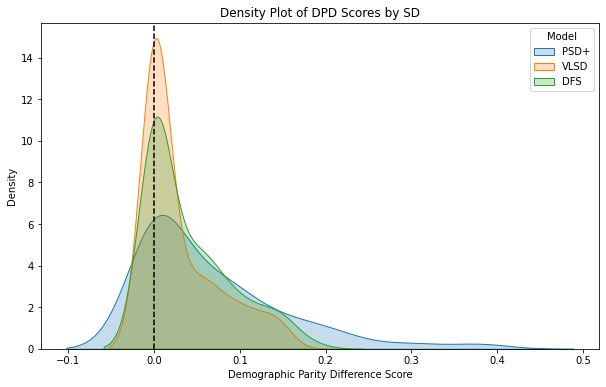

In [10]:
plt.figure(figsize=(10, 6))
for model in combined_df['model'].unique():
    subset = combined_df[combined_df['model'] == model]
    sns.kdeplot(subset['demographic_parity_difference'], label=model, color=palette[model], fill=True)

# Add a vertical line at x = 0
plt.axvline(x=0, color='black', linestyle='--')

# Add labels and title
plt.xlabel('Demographic Parity Difference Score')
plt.ylabel('Density')
plt.title('Density Plot of DPD Scores by SD')
plt.legend(title='Model')

# Show the plot
plt.show()


### Equalized Odds Difference

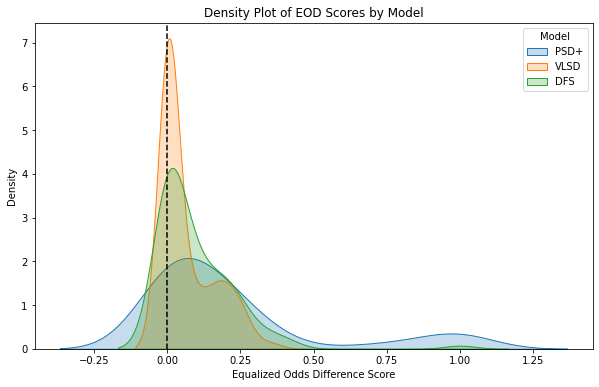

In [11]:
plt.figure(figsize=(10, 6))
for model in combined_df['model'].unique():
    subset = combined_df[combined_df['model'] == model]
    sns.kdeplot(subset['equalized_odds_difference'], label=model, color=palette[model], fill=True)

# Add a vertical line at x = 0
plt.axvline(x=0, color='black', linestyle='--')

# Add labels and title
plt.xlabel('Equalized Odds Difference Score')
plt.ylabel('Density')
plt.title('Density Plot of EOD Scores by Model')
plt.legend(title='Model')

# Show the plot
plt.show()


## Wrong Disadvantage

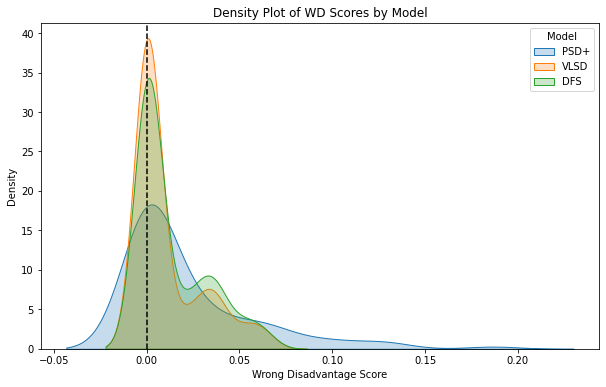

In [12]:
plt.figure(figsize=(10, 6))
for model in combined_df['model'].unique():
    subset = combined_df[combined_df['model'] == model]
    sns.kdeplot(subset['Wrong disadvantage'], label=model, color=palette[model], fill=True)

# Add a vertical line at x = 0
plt.axvline(x=0, color='black', linestyle='--')

# Add labels and title
plt.xlabel('Wrong Disadvantage Score')
plt.ylabel('Density')
plt.title('Density Plot of WD Scores by Model')
plt.legend(title='Model')

# Show the plot
plt.show()


In [13]:
PSD_values =  PSD_df['Wrong disadvantage'].value_counts()
DFS_values =  DFS_df['Wrong disadvantage'].value_counts()
VLSD_values =  VLSD_df['Wrong disadvantage'].value_counts()

print('PSD')
print('min', 'occurence')
print(PSD_df['Wrong disadvantage'].min(), PSD_values[0])
print('mean')
print(PSD_df['Wrong disadvantage'].mean())
print('max', 'occurence')
print(PSD_df['Wrong disadvantage'].max(), list(PSD_values)[-1])
print("\n")

print('DFS')
print('min', 'occurence')
print(DFS_df['Wrong disadvantage'].min(), DFS_values[0])
print('mean')
print(DFS_df['Wrong disadvantage'].mean())
print('max', 'occurence')
print(DFS_df['Wrong disadvantage'].max(), list(DFS_values)[-1])
print("\n")

print('VLSD')
print('min', 'occurence')
print(VLSD_df['Wrong disadvantage'].min(), VLSD_values[0])
print('mean')
print(VLSD_df['Wrong disadvantage'].mean())
print('max', 'occurence')
print(VLSD_df['Wrong disadvantage'].max(), list(VLSD_values)[-1])
print("\n")

PSD
min occurence
0.0 52
mean
0.022247000000000003
max occurence
0.1867 1


DFS
min occurence
0.0 51
mean
0.013117
max occurence
0.0642 1


VLSD
min occurence
0.0 60
mean
0.010821
max occurence
0.0642 1




# External Subgroup Fairness

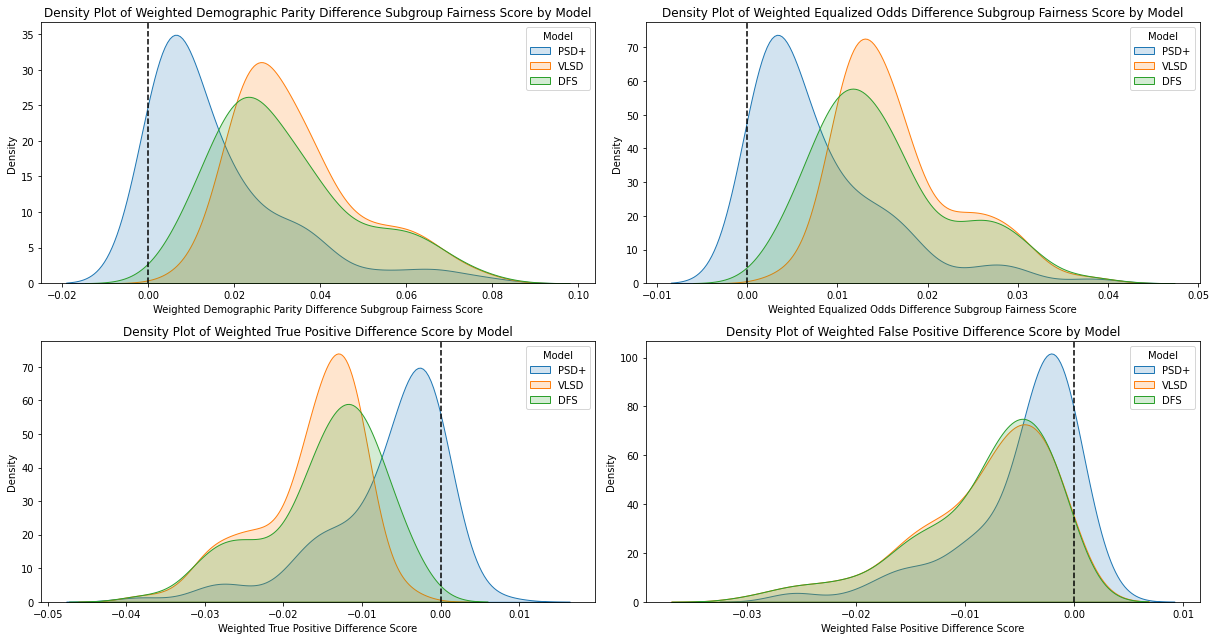

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(17, 9))

# List of metrics and their respective subplot indices
metrics = [
    ('weighted_dpd_subgroup', 'Weighted Demographic Parity Difference Subgroup Fairness Score', axes[0, 0]),
    ('weighted_eod_subgroup', 'Weighted Equalized Odds Difference Subgroup Fairness Score', axes[0, 1]),
    ('weighted_tp_subgroup', 'Weighted True Positive Difference Score', axes[1, 0]),
    ('weighted_fp_subgroup', 'Weighted False Positive Difference Score', axes[1, 1])
]

# Plot each metric in the corresponding subplot
for metric, xlabel, ax in metrics:
    for model in combined_df['model'].unique():
        subset = combined_df[combined_df['model'] == model]
        sns.kdeplot(subset[metric], label=model, color=palette[model], fill=True, ax=ax, alpha=.2)
#         ax.axvline(x=subset[metric].mean(), color=palette[model], linestyle='--')
    ax.axvline(x=0, color='black', linestyle='--')
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Density')
#     ax.set_xlim(-0.05, 0.1)
#     ax.set_ylim(0, 100)
    ax.set_title(f'Density Plot of {xlabel} by Model')
    ax.legend(title='Model')

# Adjust layout for better spacing
fig.tight_layout()
plt.show()


In [15]:
for feature in ['weighted_dpd_subgroup', 'weighted_eod_subgroup', 'weighted_tp_subgroup','weighted_fp_subgroup']:
    print(feature)
    
    c_unique_values = PSD_df[feature].unique()
    d_unique_values = DFS_df[feature].unique()
    v_unique_values = VLSD_df[feature].unique()
    c_sorted_unique_values = sorted(c_unique_values)
    d_sorted_unique_values = sorted(d_unique_values)
    v_sorted_unique_values = sorted(v_unique_values)
    cluster_values = PSD_df[feature].value_counts().loc[c_sorted_unique_values]
    DFS_values = DFS_df[feature].value_counts().loc[d_sorted_unique_values]
    VLSD_values = VLSD_df[feature].value_counts().loc[v_sorted_unique_values]
    
    print('PSD')
    print('min', 'occurence')
    print(PSD_df[feature].min(), list(cluster_values)[0])
    print('mean')
    print(PSD_df[feature].mean())
    print('max', 'occurence')
    print(PSD_df[feature].max(), list(cluster_values)[-1])
    print("\n")

    print('DFS')
    print('min', 'occurence')
    print(DFS_df[feature].min(), list(DFS_values)[0])
    print('mean')
    print(DFS_df[feature].mean())
    print('max', 'occurence')
    print(DFS_df[feature].max(), list(DFS_values)[-1])
    print("\n")

    print('VLSD')
    print('min', 'occurence')
    print(VLSD_df[feature].min(), list(VLSD_values)[0])
    print('mean')
    print(VLSD_df[feature].mean())
    print('max', 'occurence')
    print(VLSD_df[feature].max(), list(VLSD_values)[-1])
    print("\n", "\n", "\n")

weighted_dpd_subgroup
PSD
min occurence
0.0006 1
mean
0.015868
max occurence
0.078 1


DFS
min occurence
0.0053 1
mean
0.031736
max occurence
0.078 1


VLSD
min occurence
0.0085 1
mean
0.034669
max occurence
0.078 1

 
 

weighted_eod_subgroup
PSD
min occurence
0.0005 2
mean
0.00779
max occurence
0.0382 1


DFS
min occurence
0.0032 2
mean
0.015137000000000003
max occurence
0.0382 1


VLSD
min occurence
0.0042 1
mean
0.016667
max occurence
0.0382 1

 
 

weighted_tp_subgroup
PSD
min occurence
-0.0382 1
mean
-0.007004999999999999
max occurence
0.007 1


DFS
min occurence
-0.0382 1
mean
-0.015037
max occurence
-0.0031 1


VLSD
min occurence
-0.0382 1
mean
-0.016579
max occurence
-0.0042 1

 
 

weighted_fp_subgroup
PSD
min occurence
-0.0257 1
mean
-0.005007
max occurence
0.0024 1


DFS
min occurence
-0.0293 1
mean
-0.008347
max occurence
-0.0008 2


VLSD
min occurence
-0.0293 1
mean
-0.008391000000000001
max occurence
-0.0008 2

 
 



# Junk

In [16]:
PSD_df['demographic_parity_subgroup'].max()

0.1984

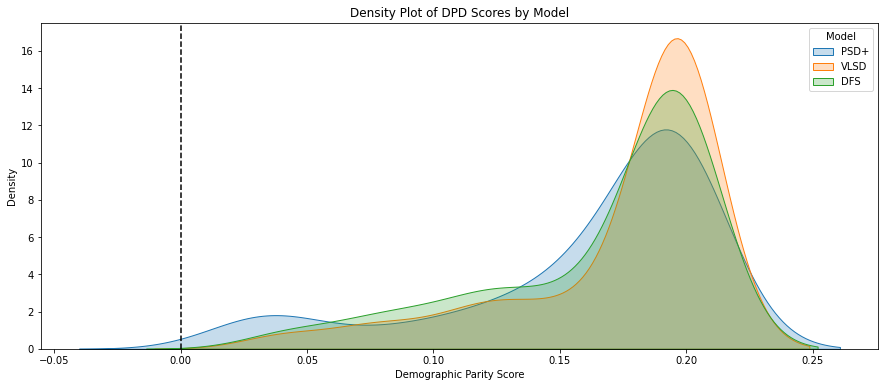

In [17]:
plt.figure(figsize=(15, 6))
for model in combined_df['model'].unique():
    subset = combined_df[combined_df['model'] == model]
    sns.kdeplot(subset['demographic_parity_subgroup'], label=model, color=palette[model], fill=True)

# Add a vertical line at x = 0
plt.axvline(x=0, color='black', linestyle='--')

# Add labels and title
plt.xlabel('Demographic Parity Score')
plt.ylabel('Density')
plt.title('Density Plot of DPD Scores by Model')
plt.legend(title='Model')

# Show the plot
plt.show()


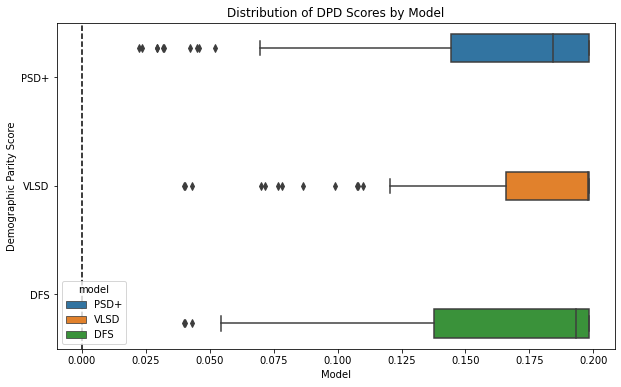

In [18]:
# colors = ['#ff6d6d', '#c2891c', '#5d9a2e']
# palette = { 'Kmedoids': colors[0], 'VLSD': colors[1], 'DFS': colors[2]}

plt.figure(figsize=(10, 6))
sns.boxplot(y='model', x='demographic_parity_subgroup', data=combined_df, palette=palette, hue='model')
plt.axvline(x=0, color='black', linestyle='--')

plt.xlabel('Model')
plt.ylabel('Demographic Parity Score')
plt.title('Distribution of DPD Scores by Model')

plt.show()

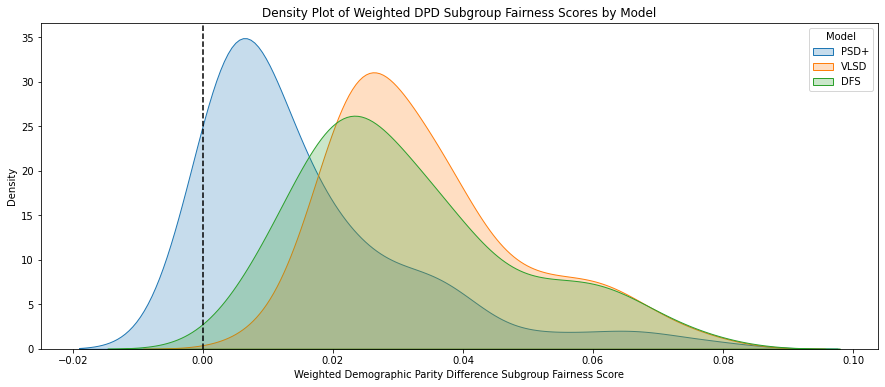

In [19]:
plt.figure(figsize=(15, 6))
for model in combined_df['model'].unique():
    subset = combined_df[combined_df['model'] == model]
    sns.kdeplot(subset['weighted_dpd_subgroup'], label=model, color=palette[model], fill=True)

# Add a vertical line at x = 0
plt.axvline(x=0, color='black', linestyle='--')

# Add labels and title
plt.xlabel('Weighted Demographic Parity Difference Subgroup Fairness Score')
plt.ylabel('Density')
plt.title('Density Plot of Weighted DPD Subgroup Fairness Scores by Model')
plt.legend(title='Model')

# Show the plot
plt.show()


### Equalized Odds Difference

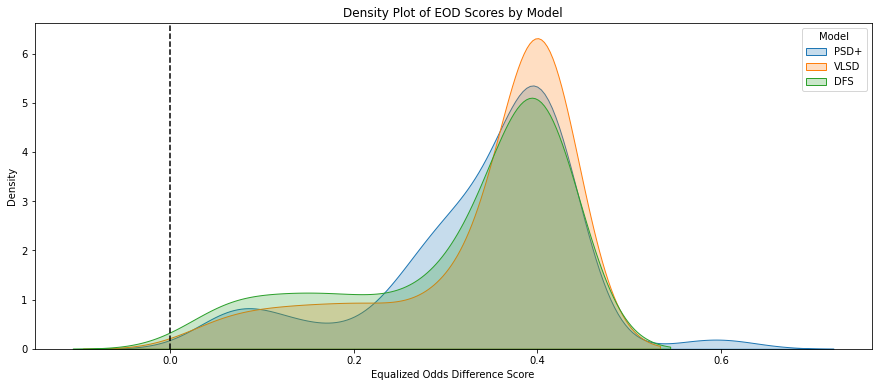

In [20]:
plt.figure(figsize=(15, 6))
for model in combined_df['model'].unique():
    subset = combined_df[combined_df['model'] == model]
    sns.kdeplot(subset['equalized_odds_subgroup'], label=model, color=palette[model], fill=True)

# Add a vertical line at x = 0
plt.axvline(x=0, color='black', linestyle='--')

# Add labels and title
plt.xlabel('Equalized Odds Difference Score')
plt.ylabel('Density')
plt.title('Density Plot of EOD Scores by Model')
plt.legend(title='Model')

# Show the plot
plt.show()


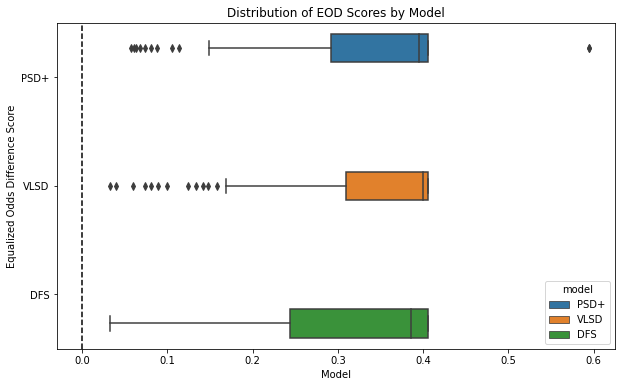

In [21]:
# colors = ['#ff6d6d', '#c2891c', '#5d9a2e']
# palette = { 'Kmedoids': colors[0], 'VLSD': colors[1], 'DFS': colors[2]}

plt.figure(figsize=(10, 6))
sns.boxplot(y='model', x='equalized_odds_subgroup', data=combined_df, palette=palette, hue='model')
plt.axvline(x=0, color='black', linestyle='--')

plt.xlabel('Model')
plt.ylabel('Equalized Odds Difference Score')
plt.title('Distribution of EOD Scores by Model')

plt.show()

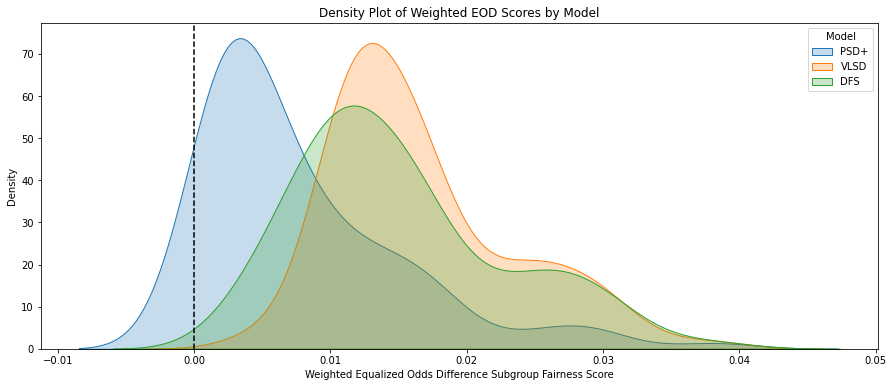

In [22]:
plt.figure(figsize=(15, 6))
for model in combined_df['model'].unique():
    subset = combined_df[combined_df['model'] == model]
    sns.kdeplot(subset['weighted_eod_subgroup'], label=model, color=palette[model], fill=True)

# Add a vertical line at x = 0
plt.axvline(x=0, color='black', linestyle='--')

# Add labels and title
plt.xlabel('Weighted Equalized Odds Difference Subgroup Fairness Score')
plt.ylabel('Density')
plt.title('Density Plot of Weighted EOD Scores by Model')
plt.legend(title='Model')

# Show the plot
plt.show()


### True Positive Difference

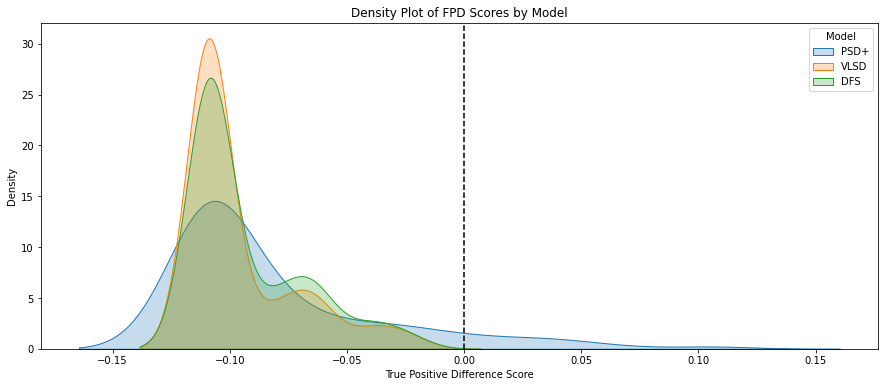

In [23]:
plt.figure(figsize=(15, 6))
for model in combined_df['model'].unique():
    subset = combined_df[combined_df['model'] == model]
    sns.kdeplot(subset['true_positive_subgroup'], label=model, color=palette[model], fill=True)

# Add a vertical line at x = 0
plt.axvline(x=0, color='black', linestyle='--')

# Add labels and title
plt.xlabel('True Positive Difference Score')
plt.ylabel('Density')
plt.title('Density Plot of FPD Scores by Model')
plt.legend(title='Model')

# Show the plot
plt.show()

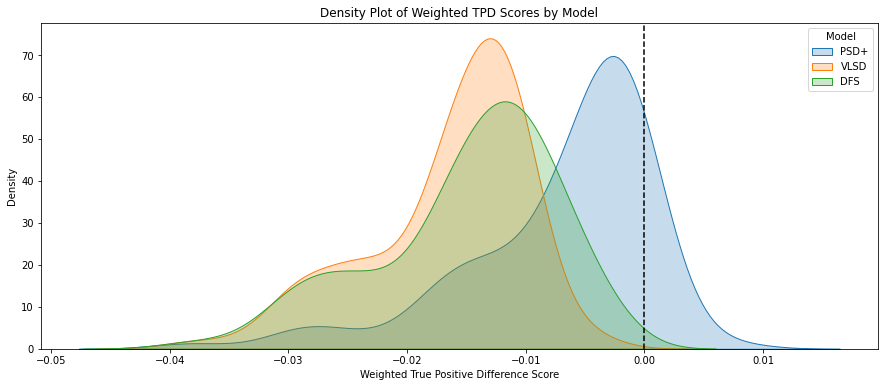

In [24]:
plt.figure(figsize=(15, 6))
for model in combined_df['model'].unique():
    subset = combined_df[combined_df['model'] == model]
    sns.kdeplot(subset['weighted_tp_subgroup'], label=model, color=palette[model], fill=True)

# Add a vertical line at x = 0
plt.axvline(x=0, color='black', linestyle='--')

# Add labels and title
plt.xlabel('Weighted True Positive Difference Score')
plt.ylabel('Density')
plt.title('Density Plot of Weighted TPD Scores by Model')
plt.legend(title='Model')

# Show the plot
plt.show()

### False Positive Difference

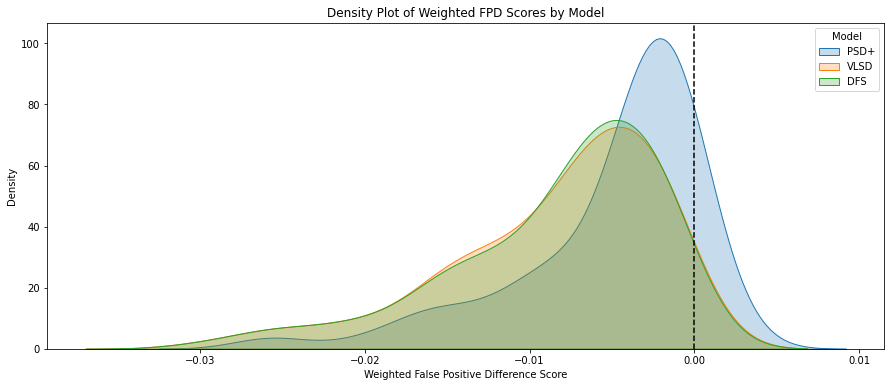

In [25]:
plt.figure(figsize=(15, 6))
for model in combined_df['model'].unique():
    subset = combined_df[combined_df['model'] == model]
    sns.kdeplot(subset['weighted_fp_subgroup'], label=model, color=palette[model], fill=True)

# Add a vertical line at x = 0
plt.axvline(x=0, color='black', linestyle='--')

# Add labels and title
plt.xlabel('Weighted False Positive Difference Score')
plt.ylabel('Density')
plt.title('Density Plot of Weighted FPD Scores by Model')
plt.legend(title='Model')

# Show the plot
plt.show()

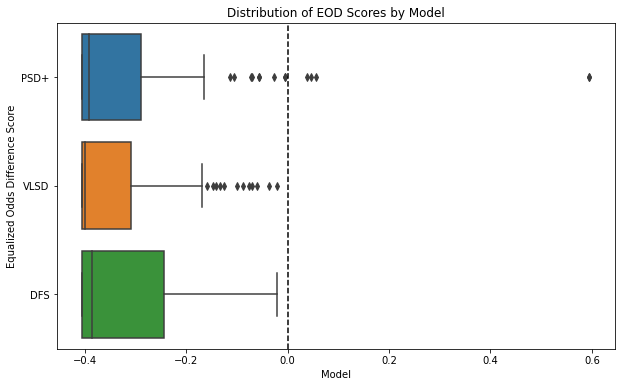

In [26]:
# colors = ['#00859a', '#42ac60', '#ffa600']
# colors = ['#ff6d6d', '#c2891c', '#5d9a2e']

# palette = { 'Kmedoids': colors[0], 'VLSD': colors[1], 'DFS': colors[2] }

plt.figure(figsize=(10, 6))
sns.boxplot(y='model', x='false_positive_subgroup', data=combined_df, palette=palette)


plt.axvline(x=0, color='black', linestyle='--')
# Add labels and title
plt.xlabel('Model')
plt.ylabel('Equalized Odds Difference Score')
plt.title('Distribution of EOD Scores by Model')

# Show the plot
plt.show()